In [10]:
from __future__ import print_function
import numpy
import matplotlib.pyplot
import scipy.spatial.distance

In [11]:
numpy.random.seed(11)

In [12]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = numpy.random.multivariate_normal(means[0], cov, N)
X1 = numpy.random.multivariate_normal(means[1], cov, N)
X2 = numpy.random.multivariate_normal(means[2], cov, N)
X = numpy.concatenate((X0, X1, X2), axis=0)
K = 3

original_label = numpy.asarray([0] * N + [1] * N + [2] * N).T

In [13]:
samples = numpy.random.multivariate_normal([2, 2], [[1, 0.5], [0.5, 1]], 5)
samples

array([[4.45476234, 4.42066116],
       [1.85562957, 1.64390989],
       [3.68425652, 3.50219598],
       [1.26329899, 1.39346839],
       [3.31870919, 3.23025091]])

In [14]:
def kmeans_display(X, label):
    K = numpy.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]

    matplotlib.pyplot.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    matplotlib.pyplot.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    matplotlib.pyplot.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    matplotlib.pyplot.axis('equal')
    matplotlib.pyplot.plot()
    matplotlib.pyplot.show()

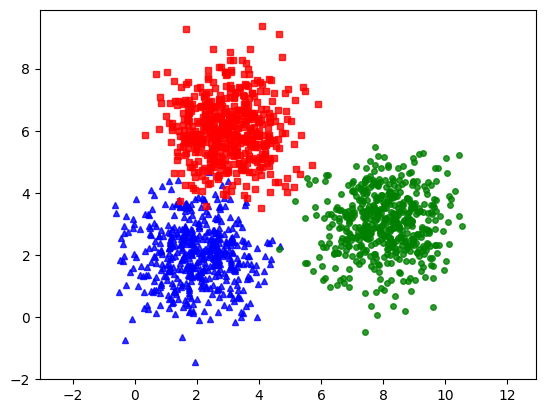

In [15]:
kmeans_display(X, original_label)

In [16]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[numpy.random.choice(X.shape[0], k, replace=False)]

In [17]:
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = scipy.spatial.distance.cdist(X, centers)
    # return index of the closest center
    return numpy.argmin(D, axis = 1)

In [18]:
def kmeans_update_centers(X, labels, K):
    centers = numpy.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = numpy.mean(Xk, axis = 0)
    return centers

In [19]:
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

In [20]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

In [21]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm')
print(centers[-1])

Centers found by our algorithm
[[8.0410628  3.02094748]
 [1.9780868  2.0065323 ]
 [2.9898012  6.03271696]]


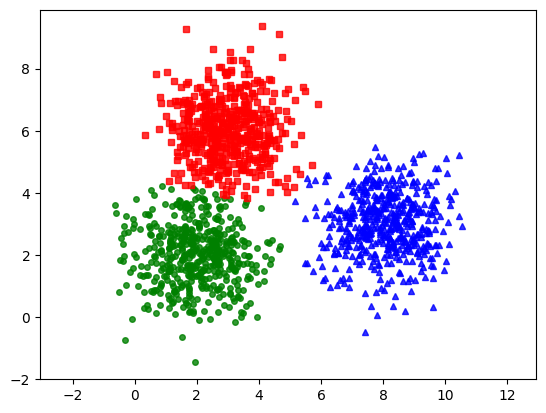

In [22]:
kmeans_display(X, labels[-1])

In [23]:
from sklearn.cluster import KMeans

Centers found by scikit-learn:
[[1.97826939 2.00223913]
 [2.98759958 6.02896527]
 [8.0410628  3.02094748]]


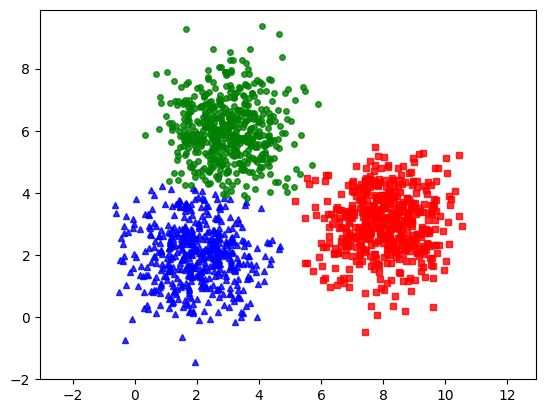

In [24]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)